In [1]:
import os
import random
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.applications.vgg19 import VGG19
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten

from sklearn.metrics import accuracy_score, confusion_matrix
from keras.applications.vgg19 import VGG19

In [2]:
model = VGG19()
print(model.summary())

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [4]:
my_model = Sequential()

for layer in model.layers[:-1]:
      my_model.add(layer)

for layer in my_model.layers:
      layer.trainable = False

prediction = Dense(3, activation='softmax')(my_model.output)

my_model = Model(inputs=my_model.input, outputs=prediction)

In [5]:
def getdata(folder):
    classes = ["butterfly", "kangaroo", "Leopards"]
    data = []

    for k in range(3):
        for i in os.listdir(f"./Group_16/{folder}/{classes[k]}"):
            if i.endswith(".jpg"):
                image = Image.open(f"./Group_16/{folder}/{classes[k]}/{i}")
                img = image.resize((224,224))
                img = np.asarray(img)
                label = np.array([0, 0, 0])
                label[k] = 1
                img = np.array([img, label])
                data.append(img)
	
    random.shuffle(data)
    return np.array(data)

In [6]:
train = getdata("train")
val = getdata("val")
test = getdata("test")

<ipython-input-5-c99272a650ce>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  img = np.array([img, label])


In [7]:
def extract(data):
    xtrain = []
    ytrain = []
    for i in range(len(data)):
        if(len(data[i][0].shape)==3):
            xtrain.append(data[i][0])
            ytrain.append(data[i][1])

    return np.array(xtrain), np.array(ytrain)

In [8]:
xtrain, ytrain = extract(train)
xval, yval = extract(val)
xtest, ytest = extract(test)

In [9]:
my_model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
es = keras.callbacks.EarlyStopping(monitor='loss', min_delta=1E-4, verbose=2, patience=1)
out = my_model.fit(xtrain, ytrain, validation_data=(xval, yval), epochs=20, callbacks=[es])

Epoch 1/20
5/5 [==============================] - 54s 11s/step - loss: 0.8840 - accuracy: 0.7260 - val_loss: 0.0238 - val_accuracy: 1.0000
Epoch 2/20
5/5 [==============================] - 54s 11s/step - loss: 0.0203 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 3/20
5/5 [==============================] - 53s 11s/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 4/20
5/5 [==============================] - 54s 11s/step - loss: 9.6419e-04 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 5/20
5/5 [==============================] - 54s 11s/step - loss: 5.0033e-04 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 6/20
5/5 [==============================] - 54s 11s/step - loss: 3.4012e-04 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 7/20
5/5 [==============================] - 54s 11s/step - loss: 2.5229e-04 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 00007

In [11]:
trainpred = my_model.predict(xtest)
trainpred = np.rint(trainpred)
print("Test Accuracy:", accuracy_score(ytest, trainpred))

Test Accuracy: 0.9830508474576272


In [15]:
cm = confusion_matrix(tf.argmax(ytest, axis=1), tf.argmax(trainpred, axis=1))

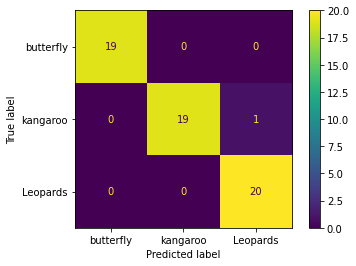

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
classes = ["butterfly", "kangaroo", "Leopards"]
disp = ConfusionMatrixDisplay(confusion_matrix(tf.argmax(ytest, axis=1), tf.argmax(trainpred, axis=1)), display_labels=classes)
disp.plot()
plt.show()

In [65]:
img = Image.open(f"./Group_16/train/butterfly/image_0001.jpg")
img = img.resize((224,224))
butterfly = np.asarray(img)

img = Image.open(f"./Group_16/train/kangaroo/image_0002.jpg")
img = img.resize((224,224))
kangaroo = np.asarray(img)

img = Image.open(f"./Group_16/train/Leopards/image_0004.jpg")
img = img.resize((224,224))
leopard = np.asarray(img)

In [34]:
new_model = Model(inputs = my_model.input, outputs = my_model.layers[20].output)

In [72]:
output = new_model.predict(np.array([leopard]))

In [67]:
def find5(arr):
    out = []
    a = arr.copy()

    for i in range(5):
        gg = np.unravel_index(np.argmax(a), a.shape)
        out.append(gg[1:])
        a[gg[0]][gg[1]][gg[2]][gg[3]] = 0
    
    return out

In [73]:
max5 = find5(output)
max5

[(5, 11, 200), (4, 11, 200), (5, 10, 200), (4, 10, 183), (5, 10, 91)]

In [60]:
def patches(img, max):
    maxim = np.array([[[255] * 3 for i in range(224)] for i in range(224)], dtype="uint8")

    for neuron in max:
        I = neuron[0]
        J = neuron[1]

        for i in range(I*16, (I+1)*16):
            for j in range(J*16, (J+1)*16):
                maxim[i][j] = img[i][j]
    
    return maxim

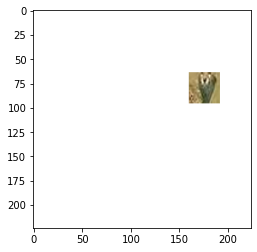

In [74]:
plt.imshow(patches(leopard, max5))

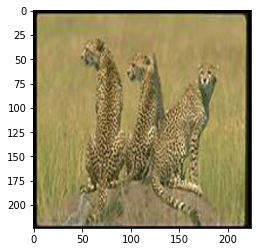

In [71]:
plt.imshow(leopard)

In [75]:
@tf.custom_gradient
def guidedRelu(a):
  def grad(dy):
    return tf.cast(dy>0,"float32") * tf.cast(a>0, "float32") * dy
  return tf.nn.relu(a), grad

In [81]:
layer_dict = [layer for layer in new_model.layers[1:] if hasattr(layer, "activation")]

for layer in layer_dict:
  if layer.activation == tf.keras.activations.relu:
    layer.activation = guidedRelu

In [148]:
for k in range(512):
    for j in range(14):
        for i in range(14):
            print(i, j, k, outputs[i][j][k])

0 0 0 tf.Tensor(0.0, shape=(), dtype=float32)
1 0 0 tf.Tensor(0.0, shape=(), dtype=float32)
2 0 0 tf.Tensor(0.0, shape=(), dtype=float32)
3 0 0 tf.Tensor(0.0, shape=(), dtype=float32)
4 0 0 tf.Tensor(0.0, shape=(), dtype=float32)
5 0 0 tf.Tensor(0.0, shape=(), dtype=float32)
6 0 0 tf.Tensor(0.0, shape=(), dtype=float32)
7 0 0 tf.Tensor(0.0, shape=(), dtype=float32)
8 0 0 tf.Tensor(0.0, shape=(), dtype=float32)
9 0 0 tf.Tensor(0.0, shape=(), dtype=float32)
10 0 0 tf.Tensor(0.0, shape=(), dtype=float32)
11 0 0 tf.Tensor(0.0, shape=(), dtype=float32)
12 0 0 tf.Tensor(0.0, shape=(), dtype=float32)
13 0 0 tf.Tensor(0.0, shape=(), dtype=float32)
0 1 0 tf.Tensor(0.0, shape=(), dtype=float32)
1 1 0 tf.Tensor(0.0, shape=(), dtype=float32)
2 1 0 tf.Tensor(0.0, shape=(), dtype=float32)
3 1 0 tf.Tensor(0.0, shape=(), dtype=float32)
4 1 0 tf.Tensor(0.0, shape=(), dtype=float32)
5 1 0 tf.Tensor(0.0, shape=(), dtype=float32)
6 1 0 tf.Tensor(0.0, shape=(), dtype=float32)
7 1 0 tf.Tensor(0.0, shape=(),

KeyboardInterrupt: 

In [162]:
with tf.GradientTape() as tp:
    inputs = tf.cast([butterfly], tf.float32)
    tp.watch(inputs)
    outputs = new_model(inputs)[0]
    grads = tp.gradient(outputs[4][6][103],inputs)[0]

In [164]:
outputs[4][6][103]

<tf.Tensor: shape=(), dtype=float32, numpy=306.61386>

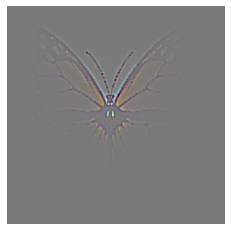

In [163]:
gb_prop = grads
guided_back_viz = np.dstack((
            gb_prop[:, :, 0],
            gb_prop[:, :, 1],
            gb_prop[:, :, 2],
        ))       
guided_back_viz -= np.min(guided_back_viz)
guided_back_viz /= guided_back_viz.max()
    
imgplot = plt.imshow(guided_back_viz)
plt.axis("off")
plt.show()